<a href="https://colab.research.google.com/github/Gk58IISERTvm98/Text_Generation/blob/main/Text_Summarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import textwrap
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('bbc_text_cls.csv')

In [4]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


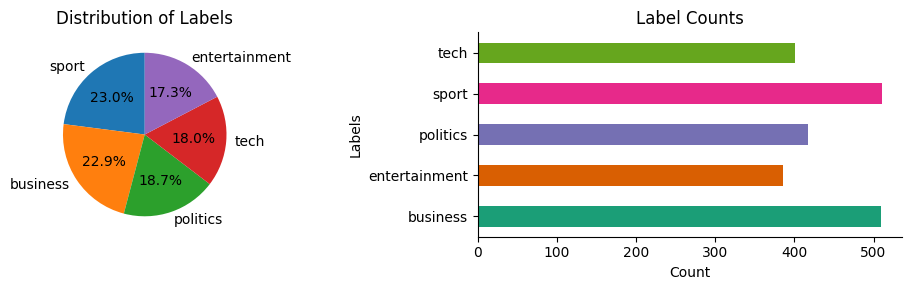

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

label_counts = df['labels'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Distribution of Labels')
df.groupby('labels').size().plot(kind='barh', color=sns.color_palette('Dark2'), ax=ax[1])
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set_title('Label Counts')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('Labels')

plt.tight_layout()
plt.show()


In [6]:
doc = df[df.labels == 'business']['text'].sample(random_state=42)

In [7]:
def wrap(x):
  return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

In [8]:
print(wrap(doc.iloc[0]))

Christmas sales worst since 1981

UK retail sales fell in December,
failing to meet expectations and making it by some counts the worst
Christmas since 1981.

Retail sales dropped by 1% on the month in
December, after a 0.6% rise in November, the Office for National
Statistics (ONS) said.  The ONS revised the annual 2004 rate of growth
down from the 5.9% estimated in November to 3.2%. A number of
retailers have already reported poor figures for December.  Clothing
retailers and non-specialist stores were the worst hit with only
internet retailers showing any significant growth, according to the
ONS.

The last time retailers endured a tougher Christmas was 23 years
previously, when sales plunged 1.7%.

The ONS echoed an earlier
caution from Bank of England governor Mervyn King not to read too much
into the poor December figures.  Some analysts put a positive gloss on
the figures, pointing out that the non-seasonally-adjusted figures
showed a performance comparable with 2003. The Novembe

In [9]:
sents = nltk.sent_tokenize(doc.iloc[0].split("\n", 1)[1])

In [10]:
featurizer = TfidfVectorizer(
    stop_words=stopwords.words('english'),
    norm='l1',
)

In [11]:
X = featurizer.fit_transform(sents)


In [12]:
import numpy as np

def get_sentence_scores(tfidf_matrix):
    return np.array([row[row.nonzero()[0]].mean() if len(row.nonzero()[0]) > 0 else 0 for row in tfidf_matrix])

X_dense = X.toarray()

scores = get_sentence_scores(X_dense)
scores

array([0.07142857, 0.08333333, 0.125     , 0.14285714, 0.07692308,
       0.09090909, 0.07142857, 0.07692308, 0.06666667, 0.07142857,
       0.125     , 0.08333333, 0.1       , 0.06666667, 0.07142857,
       0.04545455, 0.1       ])

In [13]:
sort_idx = np.argsort(-scores)

In [14]:
print("Generated summary:")
for i in sort_idx[:5]:
  print(wrap("%.2f: %s" % (scores[i], sents[i])))

Generated summary:
0.14: A number of retailers have already reported poor figures for
December.
0.13: However, reports from some High Street retailers highlight the
weakness of the sector.
0.12: The ONS revised the annual 2004 rate of growth down from the
5.9% estimated in November to 3.2%.
0.10: "Our view is the Bank of England will keep its powder dry and
wait to see the big picture."
0.10: And a British Retail Consortium survey found that Christmas 2004
was the worst for 10 years.


In [15]:
doc.iloc[0].split("\n", 1)[0]

'Christmas sales worst since 1981'

In [16]:
def summarize(text):
  sents = nltk.sent_tokenize(text)
  X = featurizer.fit_transform(sents)
  X_dense = X.toarray()
  scores = get_sentence_scores(X_dense)

  sort_idx = np.argsort(-scores)
  for i in sort_idx[:5]:
    print(wrap("%.2f: %s" % (scores[i], sents[i])))

In [17]:
doc = df[df.labels == 'entertainment']['text'].sample(random_state=123)
summarize(doc.iloc[0].split("\n", 1)[1])

0.11: The Black Eyed Peas won awards for best R 'n' B video and
sexiest video, both for Hey Mama.
0.10: The ceremony was held at the Luna Park fairground in Sydney
Harbour and was hosted by the Osbourne family.
0.10: Goodrem, Green Day and the Black Eyed Peas took home two awards
each.
0.10: Other winners included Green Day, voted best group, and the
Black Eyed Peas.
0.10: The VH1 First Music Award went to Cher honouring her
achievements within the music industry.


In [18]:
doc.iloc[0].split("\n", 1)[0]

'Goodrem wins top female MTV prize'

In [19]:
print(wrap(doc.iloc[0]))

Goodrem wins top female MTV prize

Pop singer Delta Goodrem has
scooped one of the top individual prizes at the first Australian MTV
Music Awards.

The 21-year-old singer won the award for best female
artist, with Australian Idol runner-up Shannon Noll taking the title
of best male at the ceremony.  Goodrem, known in both Britain and
Australia for her role as Nina Tucker in TV soap Neighbours, also
performed a duet with boyfriend Brian McFadden.  Other winners
included Green Day, voted best group, and the Black Eyed Peas.
Goodrem, Green Day and the Black Eyed Peas took home two awards each.
As well as best female, Goodrem also took home the Pepsi Viewers
Choice Award, whilst Green Day bagged the prize for best rock video
for American Idiot.  The Black Eyed Peas won awards for best R 'n' B
video and sexiest video, both for Hey Mama.  Local singer and
songwriter Missy Higgins took the title of breakthrough artist of the
year, with Australian Idol winner Guy Sebastian taking the honours f

# Text Rank Summarizatin

In [20]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
def summarize(text, factor = 0.15):
  sents = nltk.sent_tokenize(text)
  featurizer = TfidfVectorizer(
      stop_words=stopwords.words('english'),
      norm='l1')
  X = featurizer.fit_transform(sents)
  S = cosine_similarity(X)
  # normalize similarity matrix
  S /= S.sum(axis=1, keepdims=True)
  # uniform transition matrix
  U = np.ones_like(S) / len(S)
  # smoothed similarity matrix
  S = (1 - factor) * S + factor * U
  # find the limiting / stationary distribution
  eigenvals, eigenvecs = np.linalg.eig(S.T)
  # compute scores
  scores = eigenvecs[:,0] / eigenvecs[:,0].sum()
  # sort the scores
  sort_idx = np.argsort(-scores)
  # print summary
  for i in sort_idx[:5]:
    print(wrap("%.2f: %s" % (scores[i], sents[i])))

In [22]:
doc = df[df.labels == 'entertainment']['text'].sample(random_state=123)
summarize(doc.iloc[0].split("\n", 1)[1])

0.11: Goodrem, Green Day and the Black Eyed Peas took home two awards
each.
0.10: As well as best female, Goodrem also took home the Pepsi Viewers
Choice Award, whilst Green Day bagged the prize for best rock video
for American Idiot.
0.10: Other winners included Green Day, voted best group, and the
Black Eyed Peas.
0.10: The Black Eyed Peas won awards for best R 'n' B video and
sexiest video, both for Hey Mama.
0.10: Local singer and songwriter Missy Higgins took the title of
breakthrough artist of the year, with Australian Idol winner Guy
Sebastian taking the honours for best pop video.


In [23]:
doc.iloc[0].split("\n")[0]

'Goodrem wins top female MTV prize'

# Libraries for Text Summarization

In [24]:
!pip install sumy

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 60.8 MB/s eta 0:00:00
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21691 sha256=fbfd0c3269aac5410cd60e017c5e959e0ae4eb798ed4446288c9d3c824c5ad54
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=d8a00065ba19b29a3f50c051e4642cccb9d890a9fd50e475449c4ec94d6d6625
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built breadability docopt


In [25]:
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

In [26]:
summarizer = TextRankSummarizer()
parser = PlaintextParser.from_string(
    doc.iloc[0].split("\n", 1)[1],
    Tokenizer("english"))
summary = summarizer(parser.document, sentences_count=5)

In [27]:
summary

(<Sentence: The 21-year-old singer won the award for best female artist, with Australian Idol runner-up Shannon Noll taking the title of best male at the ceremony.>,
 <Sentence: As well as best female, Goodrem also took home the Pepsi Viewers Choice Award, whilst Green Day bagged the prize for best rock video for American Idiot.>,
 <Sentence: The Black Eyed Peas won awards for best R 'n' B video and sexiest video, both for Hey Mama.>,
 <Sentence: Local singer and songwriter Missy Higgins took the title of breakthrough artist of the year, with Australian Idol winner Guy Sebastian taking the honours for best pop video.>,
 <Sentence: The ceremony was held at the Luna Park fairground in Sydney Harbour and was hosted by the Osbourne family.>)

In [28]:
for s in summary:
  print(wrap(str(s)))

The 21-year-old singer won the award for best female artist, with
Australian Idol runner-up Shannon Noll taking the title of best male
at the ceremony.
As well as best female, Goodrem also took home the Pepsi Viewers
Choice Award, whilst Green Day bagged the prize for best rock video
for American Idiot.
The Black Eyed Peas won awards for best R 'n' B video and sexiest
video, both for Hey Mama.
Local singer and songwriter Missy Higgins took the title of
breakthrough artist of the year, with Australian Idol winner Guy
Sebastian taking the honours for best pop video.
The ceremony was held at the Luna Park fairground in Sydney Harbour
and was hosted by the Osbourne family.


In [29]:
summarizer = LsaSummarizer()
summary = summarizer(parser.document, sentences_count=5)
for s in summary:
  print(wrap(str(s)))

Goodrem, known in both Britain and Australia for her role as Nina
Tucker in TV soap Neighbours, also performed a duet with boyfriend
Brian McFadden.
Other winners included Green Day, voted best group, and the Black Eyed
Peas.
Goodrem, Green Day and the Black Eyed Peas took home two awards each.
As well as best female, Goodrem also took home the Pepsi Viewers
Choice Award, whilst Green Day bagged the prize for best rock video
for American Idiot.
Artists including Carmen Electra, Missy Higgins, Kelly Osbourne, Green
Day, Ja Rule and Natalie Imbruglia gave live performances at the
event.
